In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [22]:
df = pd.read_csv('../data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
df[['sqft_living', 'sqft_above']]

,sqft_living,sqft_above
0,1180,1180
1,2570,2170
2,770,770
3,1960,1050
4,1680,1680
...,...,...
21592,1530,1530
21593,2310,2310
21594,1020,1020
21595,1600,1600


In [24]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650


In [25]:
df_f = df[['price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot','sqft_above' ,'floors'
           ,'yr_built', 'lat', 'long']]
df_f.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1180,1.0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2170,2.0,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,770,1.0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1050,1.0,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1680,1.0,1987,47.6168,-122.045


In [26]:
df_f['basement_sqft'] = df['sqft_living'] - df['sqft_above']

<ipython-input-26-69f2dbcfda34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['basement_sqft'] = df['sqft_living'] - df['sqft_above']


In [27]:
df_f.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft
0,221900.0,3,1.00,1180,5650,1180,1.0,1955,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2170,2.0,1951,47.7210,-122.319,400
2,180000.0,2,1.00,770,10000,770,1.0,1933,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1050,1.0,1965,47.5208,-122.393,910
4,510000.0,3,2.00,1680,8080,1680,1.0,1987,47.6168,-122.045,0


In [28]:
# df_f['bedrooms'] = df_f.loc[df_f['bedrooms'] != 33]

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
df_f.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1788.596842,1.494096,1970.999676,47.560093,-122.213982,291.725008
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,827.759761,0.539683,29.375234,0.138552,0.140724,442.667800
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,1.000000,1900.000000,47.155900,-122.519000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1190.000000,1.000000,1951.000000,47.471100,-122.328000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,1.500000,1975.000000,47.571800,-122.231000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2210.000000,2.000000,1997.000000,47.678000,-122.125000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,3.500000,2015.000000,47.777600,-121.315000,4820.000000


In [31]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   sqft_above     21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   yr_built       21597 non-null  int64  
 8   lat            21597 non-null  float64
 9   long           21597 non-null  float64
 10  basement_sqft  21597 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.8 MB


### Date

In [32]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [33]:
# df['date'].str.split('/')[0][2]
# pulls out just the year for not parse_date
# maybe loop this so that can make just a 'year' column

### Bedrooms

In [34]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [177]:
df['long'].mean()

-122.2139824975691

In [178]:
df['lat'].mean()

47.56009299439737

In [183]:
df['sqft_above'].mean()

1788.5968421540028

In [185]:
df['sqft_lot'].mean()

15099.408760475992

In [186]:
df['sqft_living'].mean()

2080.3218502569803

In [181]:
df['long'].head(15)

0    -122.257
1    -122.319
2    -122.233
3    -122.393
4    -122.045
5    -122.005
6    -122.327
7    -122.315
8    -122.337
9    -122.031
10   -122.145
11   -122.292
12   -122.229
13   -122.045
14   -122.394
Name: long, dtype: float64

In [188]:
462275464 <= 165000

False

### Price

In [35]:
df['price'].sort_values(ascending=False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [190]:
df['price'].min()

78000.0

In [158]:
len(df.loc[(df['price'] >500000) & (df['price'] <650000)])

3729

In [157]:
len(df_f.loc[df_f['price'] < 650000])

16275

### Year Built

In [37]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [176]:
df['yr_built'].min()

1900

In [159]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [162]:
df_f['age'] = 2015 - df['yr_built']
df_f['age']

<ipython-input-162-de23169150df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['age'] = 2015 - df['yr_built']


0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21597, dtype: int64

In [166]:
df_f['age'].value_counts(ascending=False)

1      559
9      453
10     450
11     433
12     420
      ... 
82      30
114     29
113     27
80      24
81      21
Name: age, Length: 116, dtype: int64

In [173]:
len(df_f.loc[df_f['age'] <= 50])

13001

In [38]:
df.loc[(df['yr_built'] == 2014) | (df['yr_built']==2015)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,NO,NONE,...,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,NO,NONE,...,8 Good,1540,0.0,2014,0.0,98115,47.6765,-122.320,1580,3090
133,8929000270,2014-05-12,453246.0,3,2.50,2010,2287,2.0,NO,NONE,...,8 Good,1390,620.0,2014,0.0,98029,47.5517,-121.998,1690,1662
139,2767603505,2014-05-07,519950.0,3,2.25,1170,1249,3.0,NO,NONE,...,8 Good,1170,0.0,2014,NaN,98107,47.6722,-122.381,1350,1310
211,1025049114,2014-07-17,625504.0,3,2.25,1270,1566,2.0,NO,NONE,...,8 Good,1060,210.0,2014,0.0,98105,47.6647,-122.284,1160,1327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21588,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


### Model-less Baseline

In [39]:
y_mean = df_f['price'].mean()
y_mean

540296.5735055795

In [40]:
y_preds = [y_mean] * len(df_f)
y_preds

[540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,


## Model 1

### Kitchen Sink Approach no train test split

In [41]:
X = df_f.drop(columns='price')
y = df_f['price']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

model_ntts = sm.OLS(y,sm.add_constant(X_scaled)).fit()
model_ntts.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3767.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:34:14   Log-Likelihood:            -2.9720e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21587   BIC:                         5.945e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.403e+05   1559.460    346.464      0.000    5.37e+05    5.43e+05
bedrooms      -5.554e+04   1960.424    -28.331      0.000   -5.94e+04   -5.17e+04
bathrooms      4.908e+04   2819.614     17.406      0.000    4.36e+04    5.46e+04
sqft_living    1.405e+05   1331.169    105.560      0.000    1.38e+05    1.43e+05
sqft_lot      -1244.2487   1636.459     -0.760      0.447   -4451.828    1963.331
sqft_above     1.311e+05   1467.084     89.335      0.000    1.28e+05    1.34e+05
floors         5780.1474   2171.963      2.661      0.008    1522.940       1e+04
yr_built      -6.903e+04   2121.483    -32.540      0.000   -7.32e+04   -6.49e+04
lat            8.411e+04   1616.198     52.039      0.000    8.09e+04    8.73e+04
long          -2.875e+04   1838.599    -15.637      0.000   -3.24e+04   -2.51e+04
basement_sqft  4.636e+04   1730.486     26.791      0.000     4.3e+04    4.98e+04
==============================================================================
Omnibus:                    16306.458   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           832503.485
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      32.755   Cond. No.                     7.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 2

### Train Test Split ~ Kitchen Sink Approach

In [42]:
X = df_f.drop(columns='price')
y = df_f['price']

# train test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
len(X.columns)

10

In [44]:
X_train.shape

(14469, 10)

In [45]:
X_test.shape

(7128, 10)

In [46]:
len(X_train + X_test) == len(df_f)

True

In [47]:
y_train.shape

(14469,)

In [48]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft
19709,5,3.75,3330,5042,2470,2.0,2014,47.6497,-122.339,860
4800,3,2.00,1678,13862,1678,1.0,1994,47.3744,-122.190,0
13225,4,1.00,1550,15239,1370,1.5,1930,47.4502,-122.378,180
16111,3,2.50,2760,9471,1760,1.0,1956,47.6760,-122.272,1000
17711,2,1.50,1400,5810,1400,2.0,1940,47.6843,-122.341,0


In [49]:
y_train.head()
# price

19709    1380000.0
4800      353000.0
13225     685000.0
16111     800000.0
17711     575000.0
Name: price, dtype: float64

In [50]:
train_df = X_train.copy()
train_df['target'] = y_train

In [51]:
train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft,target
19709,5,3.75,3330,5042,2470,2.0,2014,47.6497,-122.339,860,1380000.0
4800,3,2.00,1678,13862,1678,1.0,1994,47.3744,-122.190,0,353000.0
13225,4,1.00,1550,15239,1370,1.5,1930,47.4502,-122.378,180,685000.0
16111,3,2.50,2760,9471,1760,1.0,1956,47.6760,-122.272,1000,800000.0
17711,2,1.50,1400,5810,1400,2.0,1940,47.6843,-122.341,0,575000.0


In [52]:
train_df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft,target
bedrooms,1.000000,0.530802,0.593719,0.039381,0.492576,0.182357,0.155514,-0.014104,0.134689,0.313925,0.321212
bathrooms,0.530802,1.000000,0.760773,0.089418,0.690267,0.503681,0.495821,0.031525,0.219310,0.291926,0.535071
sqft_living,0.593719,0.760773,1.000000,0.183421,0.876812,0.352124,0.313008,0.051976,0.242544,0.440686,0.701469
sqft_lot,0.039381,0.089418,0.183421,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.233358,0.025161,0.087953
sqft_above,0.492576,0.690267,0.876812,0.190645,1.000000,0.523269,0.420487,-0.001818,0.345686,-0.045227,0.601325
floors,0.182357,0.503681,0.352124,-0.004557,0.523269,1.000000,0.488199,0.049980,0.126320,-0.245313,0.256883
yr_built,0.155514,0.495821,0.313008,0.057133,0.420487,0.488199,1.000000,-0.153226,0.412844,-0.134699,0.046539
lat,-0.014104,0.031525,0.051976,-0.079332,-0.001818,0.049980,-0.153226,1.000000,-0.134008,0.111379,0.303543
long,0.134689,0.219310,0.242544,0.233358,0.345686,0.126320,0.412844,-0.134008,1.000000,-0.141449,0.021893
basement_sqft,0.313925,0.291926,0.440686,0.025161,-0.045227,-0.245313,-0.134699,0.111379,-0.141449,1.000000,0.334761


<AxesSubplot:>

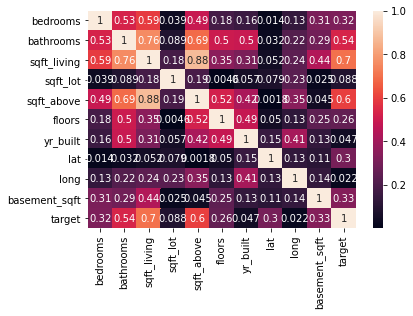

In [53]:
sns.heatmap(abs(train_df.corr()), annot=True)

In [54]:
train_df.corr()['target'].sort_values(ascending=False)
# sqft_living is highest corr to price

target           1.000000
sqft_living      0.701469
sqft_above       0.601325
bathrooms        0.535071
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
floors           0.256883
sqft_lot         0.087953
yr_built         0.046539
long             0.021893
Name: target, dtype: float64

#### Scaling

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# First model scaled
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
model.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:34:22   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_living    1.407e+05   1660.490     84.732      0.000    1.37e+05    1.44e+05
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     1.298e+05   1826.831     71.033      0.000    1.26e+05    1.33e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
yr_built      -7.193e+04   2609.538    -27.563      0.000    -7.7e+04   -6.68e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  5.006e+04   2146.095     23.324      0.000    4.58e+04    5.43e+04
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                     7.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
evalute_y = pd.DataFrame(y_test)
evalute_y.head()

,price
3686,132500.0
10247,415000.0
4037,494000.0
3437,355000.0
19291,606000.0


In [57]:
evalute_y['prediction'] = model.predict(sm.add_constant(X_test_scaled))
evalute_y.head()

,price,prediction
3686,132500.0,142818.804322
10247,415000.0,466801.393770
4037,494000.0,229523.056476
3437,355000.0,271080.013835
19291,606000.0,445326.501467


In [58]:
train_preds = model.predict(sm.add_constant(X_train_scaled))
test_preds = model.predict(sm.add_constant(X_test_scaled))

print(f"Model Train R2: {r2_score(y_train, train_preds)}")
print(f"Model Test R2: {r2_score(y_test, test_preds)}")
print(f"Model Test RMSE: {mse(y_test, test_preds, squared = False)}")

Model Train R2: 0.6098881818962667
Model Test R2: 0.612431640012299
Model Test RMSE: 225099.1313603771


#### Residuals

In [59]:
residuals = y_test-test_preds
residuals

3686     -10318.804322
10247    -51801.393770
4037     264476.943524
3437      83919.986165
19291    160673.498533
             ...      
17525    -44750.343373
5761    -149889.791600
18907    -49117.754918
12348     17810.644242
3448      68391.863896
Name: price, Length: 7128, dtype: float64

In [60]:
RSS = sum(residuals**2)
RSS

361173043798590.44

#### Linear?

In [61]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'floors', 'yr_built', 'lat', 'long', 'basement_sqft'],
      dtype='object')

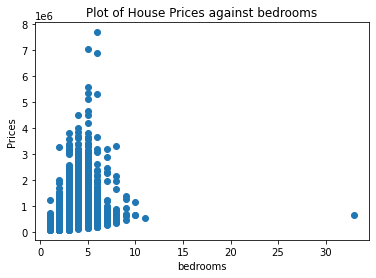

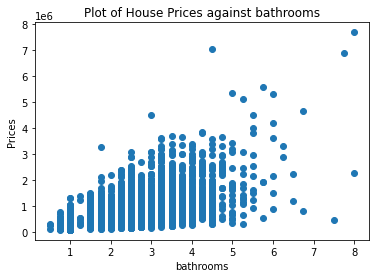

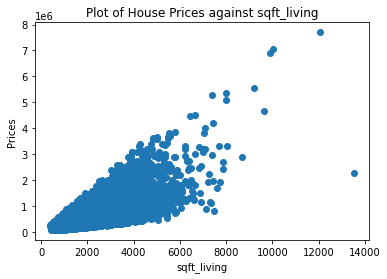

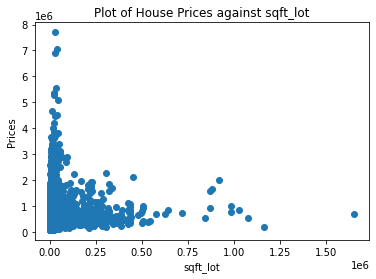

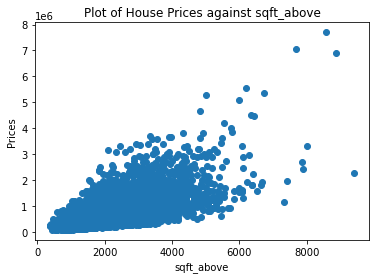

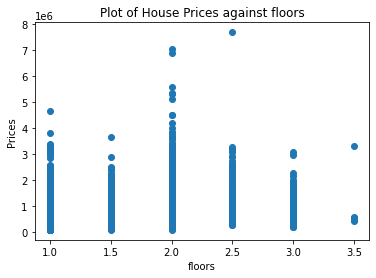

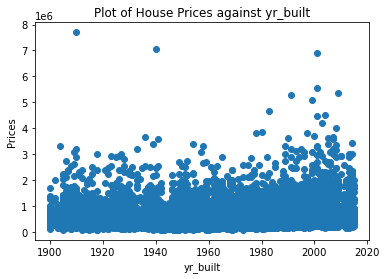

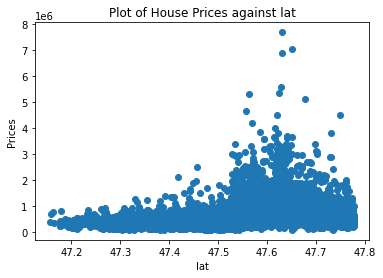

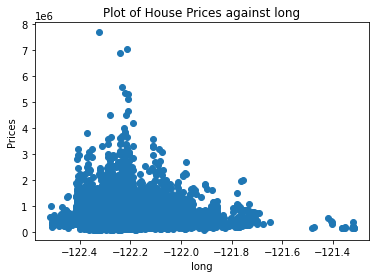

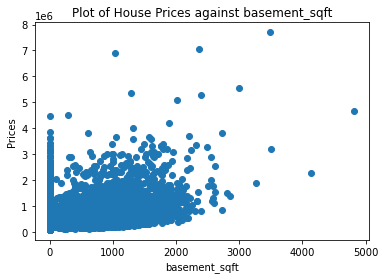

In [62]:
features = X.columns

for x in features:
    plt.scatter(X[x], y)
    plt.title(f'Plot of House Prices against {x}')
    plt.xlabel(x)
    plt.ylabel('Prices')
    plt.show()

In [63]:
df_f['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

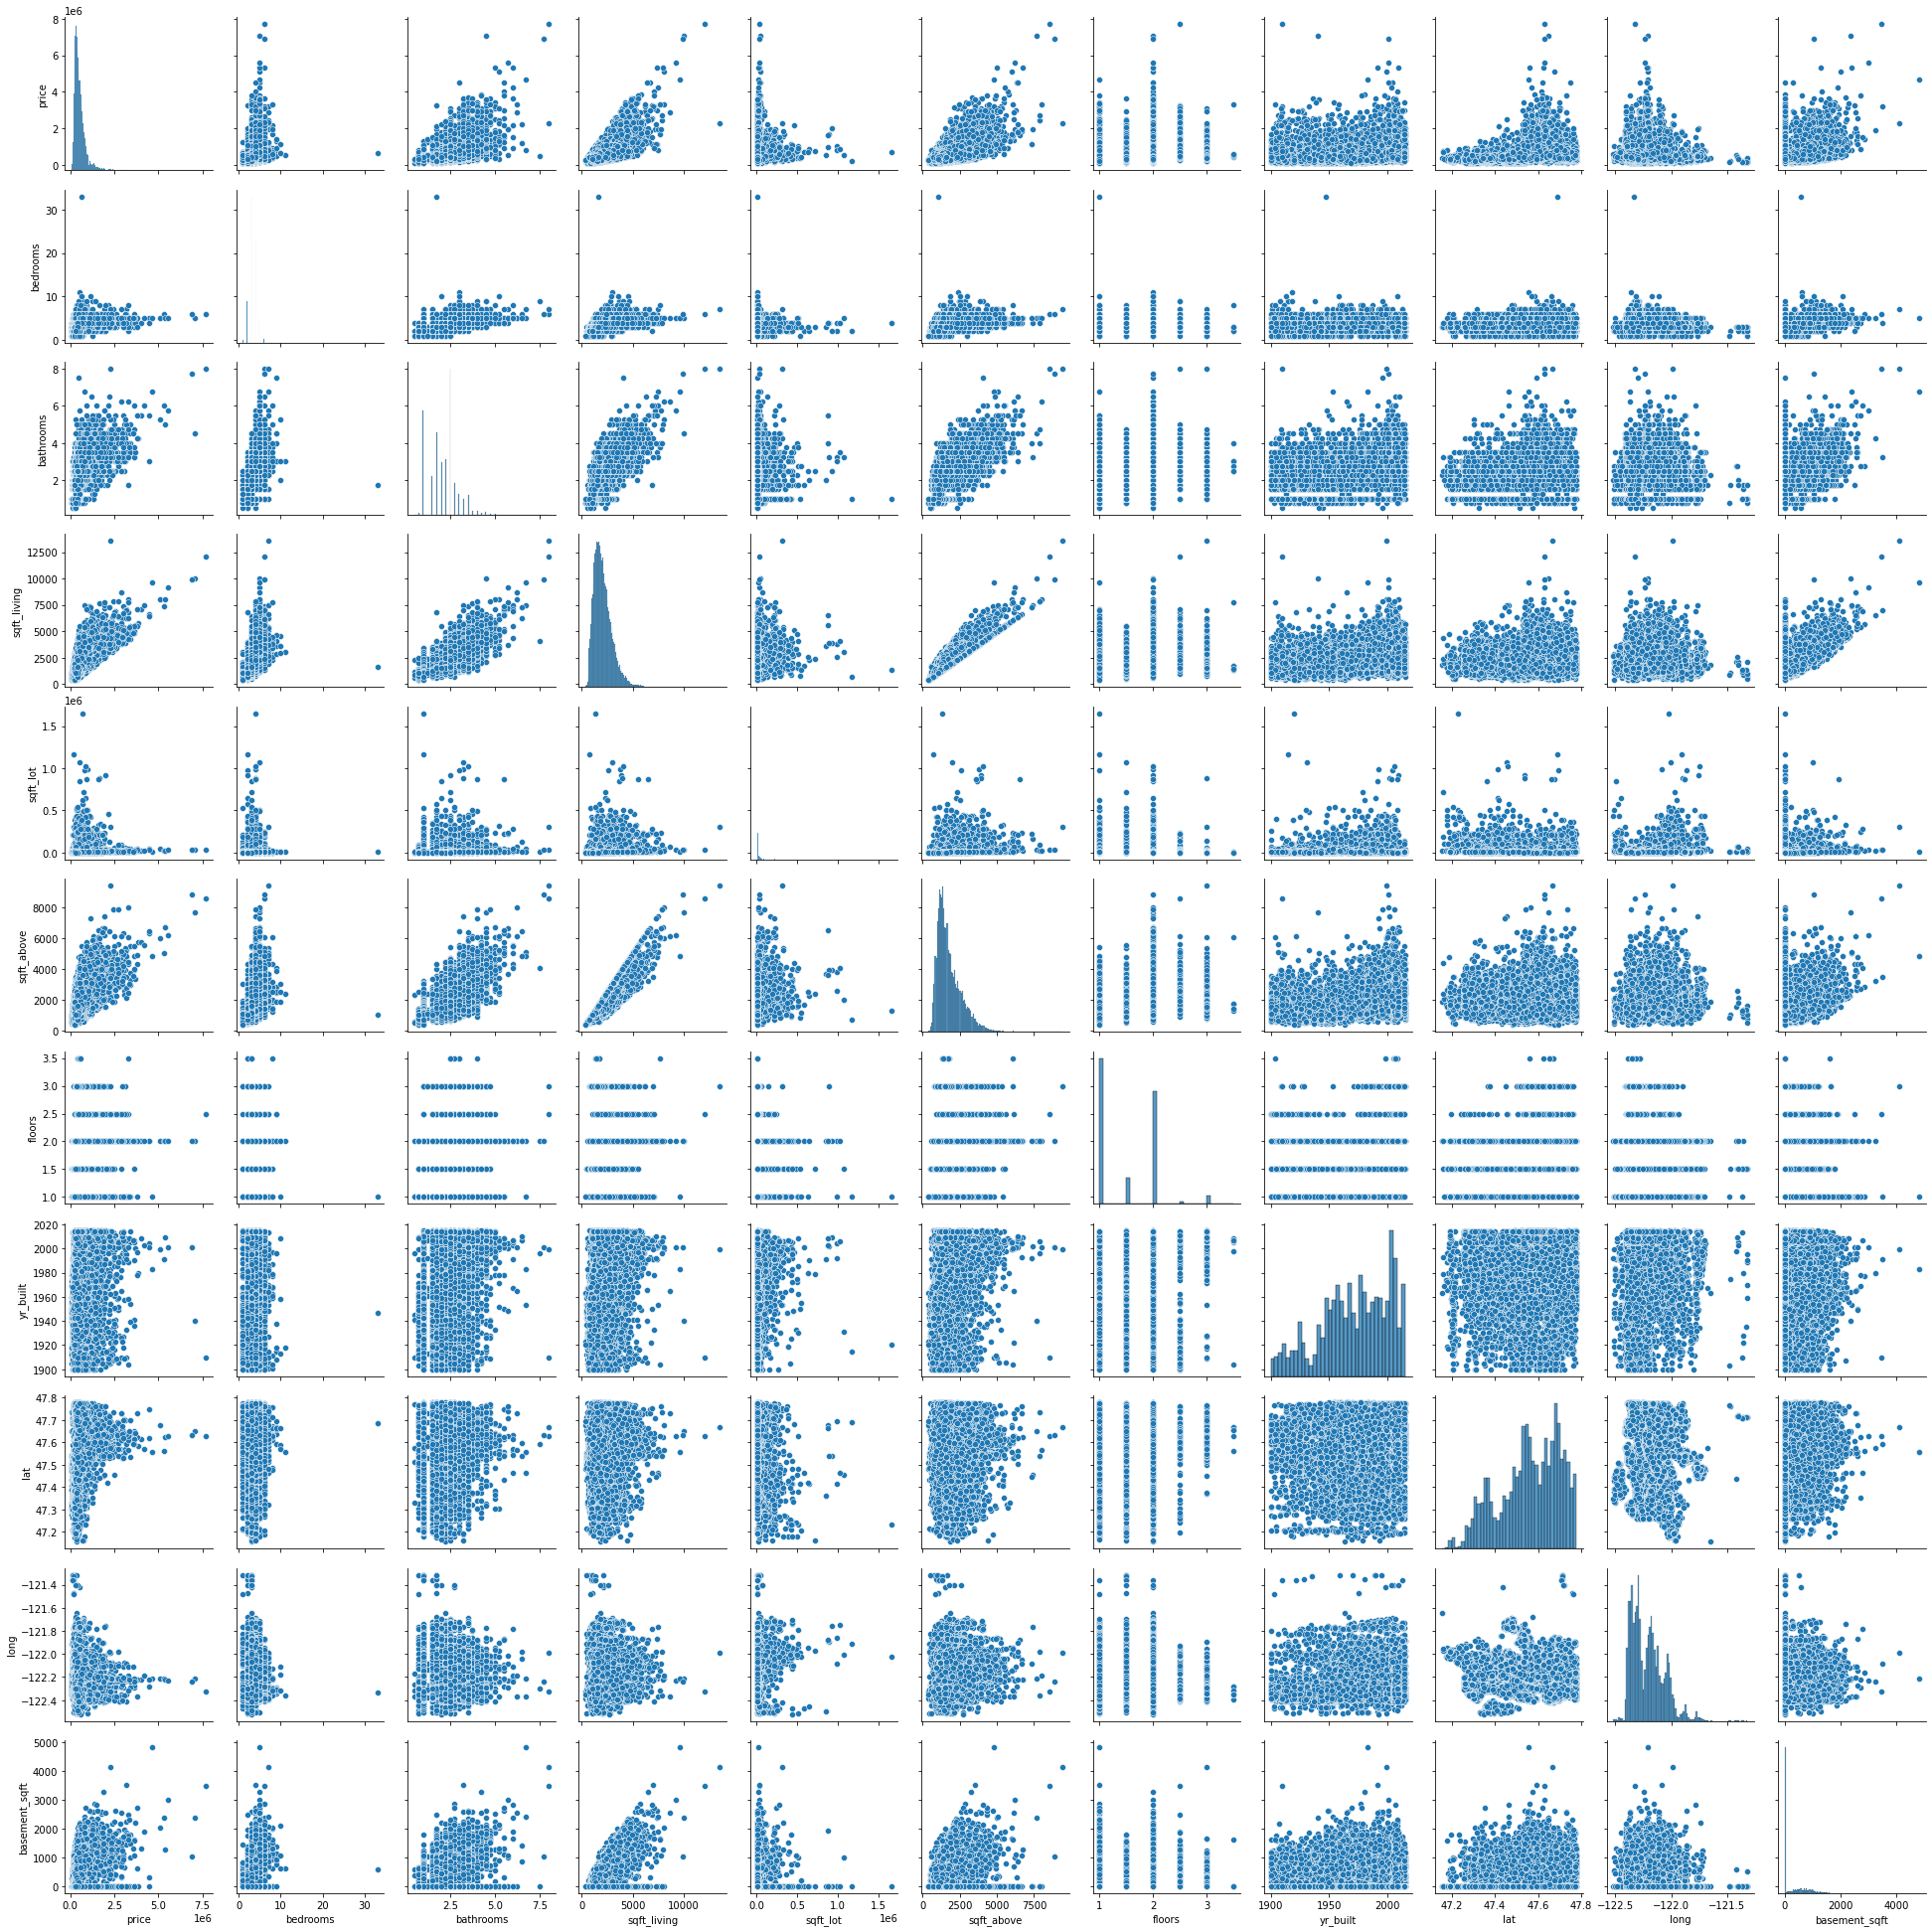

In [64]:
sns.pairplot(df_f)
plt.show()

#### Multicollinerity

In [65]:
X_train.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft
bedrooms,1.000000,0.530802,0.593719,0.039381,0.492576,0.182357,0.155514,-0.014104,0.134689,0.313925
bathrooms,0.530802,1.000000,0.760773,0.089418,0.690267,0.503681,0.495821,0.031525,0.219310,0.291926
sqft_living,0.593719,0.760773,1.000000,0.183421,0.876812,0.352124,0.313008,0.051976,0.242544,0.440686
sqft_lot,0.039381,0.089418,0.183421,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.233358,0.025161
sqft_above,0.492576,0.690267,0.876812,0.190645,1.000000,0.523269,0.420487,-0.001818,0.345686,-0.045227
floors,0.182357,0.503681,0.352124,-0.004557,0.523269,1.000000,0.488199,0.049980,0.126320,-0.245313
yr_built,0.155514,0.495821,0.313008,0.057133,0.420487,0.488199,1.000000,-0.153226,0.412844,-0.134699
lat,-0.014104,0.031525,0.051976,-0.079332,-0.001818,0.049980,-0.153226,1.000000,-0.134008,0.111379
long,0.134689,0.219310,0.242544,0.233358,0.345686,0.126320,0.412844,-0.134008,1.000000,-0.141449
basement_sqft,0.313925,0.291926,0.440686,0.025161,-0.045227,-0.245313,-0.134699,0.111379,-0.141449,1.000000


<AxesSubplot:>

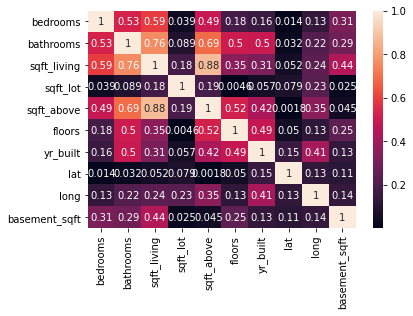

In [66]:
sns.heatmap(abs(X_train.corr()),annot= True)

#### Normality

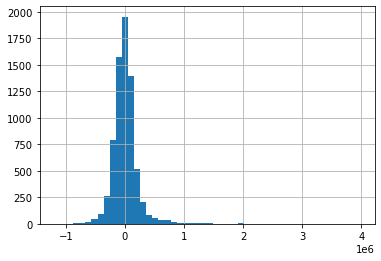

In [67]:
residuals.hist(bins=50);

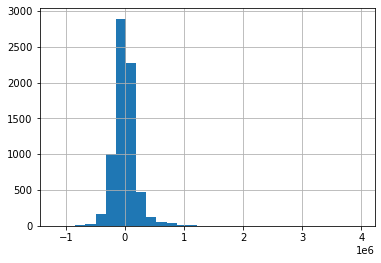

In [68]:
residuals[abs(residuals) > 1].hist(bins=30);

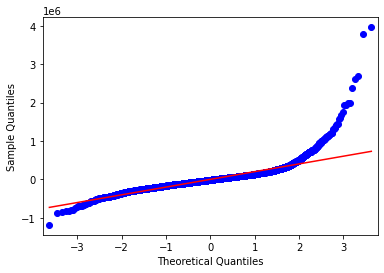

In [69]:
sm.qqplot(residuals, line='r');

#### Homoskedasticity

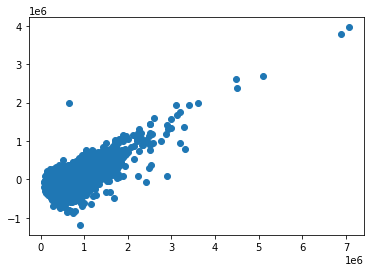

In [70]:
fig, ax = plt.subplots()

ax.scatter(y_test, residuals);

### Model 3 - drop sqft_living

In [71]:
X3 = df_f.drop(columns=['price', 'sqft_living'])
y3 = df_f['price']

# train test split
X3_train, X3_test, y3_train, y3_test =train_test_split(X3, y3, test_size=0.33, random_state=42)

In [72]:
len(X3.columns)

9

In [73]:
len(X.columns)

10

In [74]:
train_df3 = X3_train.copy()
train_df3['target'] = y3_train

train_df3.head()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft,target
19709,5,3.75,5042,2470,2.0,2014,47.6497,-122.339,860,1380000.0
4800,3,2.00,13862,1678,1.0,1994,47.3744,-122.190,0,353000.0
13225,4,1.00,15239,1370,1.5,1930,47.4502,-122.378,180,685000.0
16111,3,2.50,9471,1760,1.0,1956,47.6760,-122.272,1000,800000.0
17711,2,1.50,5810,1400,2.0,1940,47.6843,-122.341,0,575000.0


In [75]:
train_df3.corr()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft,target
bedrooms,1.000000,0.530802,0.039381,0.492576,0.182357,0.155514,-0.014104,0.134689,0.313925,0.321212
bathrooms,0.530802,1.000000,0.089418,0.690267,0.503681,0.495821,0.031525,0.219310,0.291926,0.535071
sqft_lot,0.039381,0.089418,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.233358,0.025161,0.087953
sqft_above,0.492576,0.690267,0.190645,1.000000,0.523269,0.420487,-0.001818,0.345686,-0.045227,0.601325
floors,0.182357,0.503681,-0.004557,0.523269,1.000000,0.488199,0.049980,0.126320,-0.245313,0.256883
yr_built,0.155514,0.495821,0.057133,0.420487,0.488199,1.000000,-0.153226,0.412844,-0.134699,0.046539
lat,-0.014104,0.031525,-0.079332,-0.001818,0.049980,-0.153226,1.000000,-0.134008,0.111379,0.303543
long,0.134689,0.219310,0.233358,0.345686,0.126320,0.412844,-0.134008,1.000000,-0.141449,0.021893
basement_sqft,0.313925,0.291926,0.025161,-0.045227,-0.245313,-0.134699,0.111379,-0.141449,1.000000,0.334761
target,0.321212,0.535071,0.087953,0.601325,0.256883,0.046539,0.303543,0.021893,0.334761,1.000000


<AxesSubplot:>

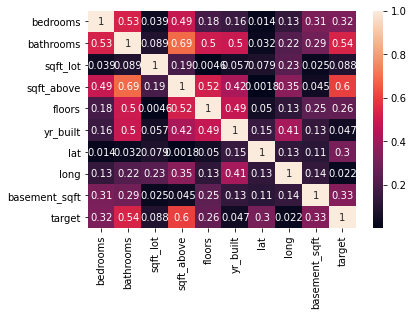

In [76]:
sns.heatmap(abs(train_df3.corr()),annot=True)

In [77]:
train_df3.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
bathrooms        0.535071
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
floors           0.256883
sqft_lot         0.087953
yr_built         0.046539
long             0.021893
Name: target, dtype: float64

#### Scaling

In [78]:
scaler = StandardScaler()
scaler.fit(X3_train)

X3_train_scaled = scaler.transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Second model scaled
model3 = sm.OLS(y3_train, sm.add_constant(X3_train_scaled)).fit()
model3.summary(xname=['Y-Intercept', *X3.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:26   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     2.562e+05   3154.130     81.224      0.000     2.5e+05    2.62e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
yr_built      -7.193e+04   2609.538    -27.563      0.000    -7.7e+04   -6.68e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  1.178e+05   2524.689     46.650      0.000    1.13e+05    1.23e+05
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:26   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_living    1.407e+05   1660.490     84.732      0.000    1.37e+05    1.44e+05
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     1.298e+05   1826.831     71.033      0.000    1.26e+05    1.33e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
yr_built      -7.193e+04   2609.538    -27.563      0.000    -7.7e+04   -6.68e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  5.006e+04   2146.095     23.324      0.000    4.58e+04    5.43e+04
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                     7.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
evalute_y3 = pd.DataFrame(y3_test)
evalute_y3.head()

,price
3686,132500.0
10247,415000.0
4037,494000.0
3437,355000.0
19291,606000.0


In [81]:
evalute_y3['prediction'] = model3.predict(sm.add_constant(X3_test_scaled))
evalute_y3.head()

,price,prediction
3686,132500.0,142818.804322
10247,415000.0,466801.393770
4037,494000.0,229523.056476
3437,355000.0,271080.013835
19291,606000.0,445326.501467


In [82]:
train3_preds = model3.predict(sm.add_constant(X3_train_scaled))
test3_preds = model3.predict(sm.add_constant(X3_test_scaled))

print(f"Model3 Train R2: {r2_score(y3_train, train3_preds)}")
print(f"Model3 Test R2: {r2_score(y3_test, test3_preds)}")
print(f"Model3 Test RMSE: {mse(y3_test, test3_preds, squared = False)}")

Model3 Train R2: 0.6098881818962667
Model3 Test R2: 0.612431640012299
Model3 Test RMSE: 225099.1313603771


#### Residuals

In [83]:
residuals3 = y3_test-test3_preds
residuals3

3686     -10318.804322
10247    -51801.393770
4037     264476.943524
3437      83919.986165
19291    160673.498533
             ...      
17525    -44750.343373
5761    -149889.791600
18907    -49117.754918
12348     17810.644242
3448      68391.863896
Name: price, Length: 7128, dtype: float64

In [84]:
RSS3 = sum(residuals3**2)
RSS3

361173043798590.4

#### Linear?

In [85]:
X3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'floors', 'yr_built',
       'lat', 'long', 'basement_sqft'],
      dtype='object')

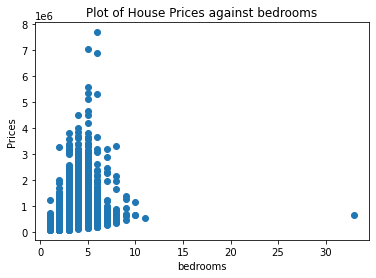

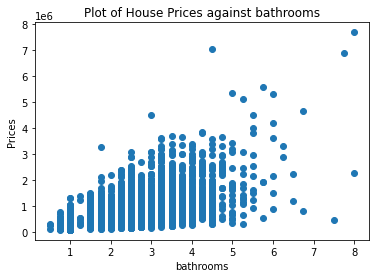

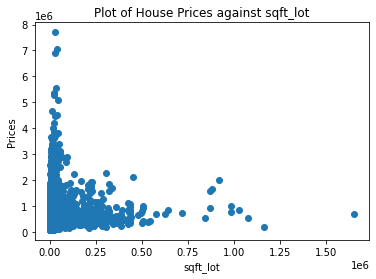

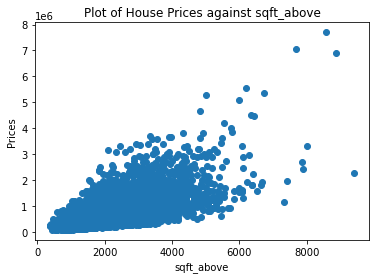

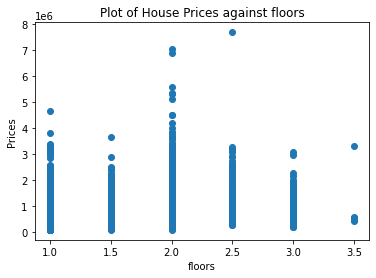

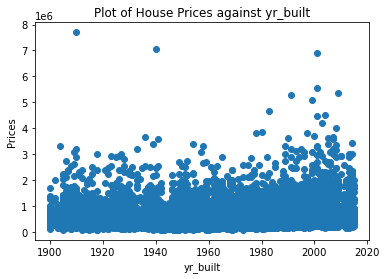

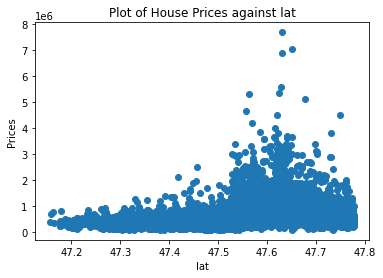

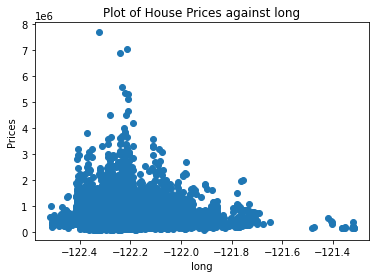

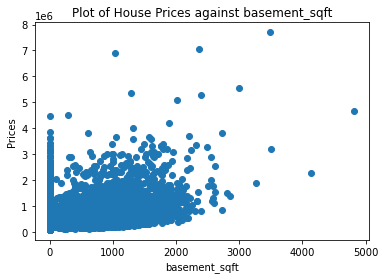

In [86]:
features = X3.columns

for x in features:
    plt.scatter(X[x], y)
    plt.title(f'Plot of House Prices against {x}')
    plt.xlabel(x)
    plt.ylabel('Prices')
    plt.show()

#### Multicolinearity

In [87]:
X3_train.corr()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,long,basement_sqft
bedrooms,1.000000,0.530802,0.039381,0.492576,0.182357,0.155514,-0.014104,0.134689,0.313925
bathrooms,0.530802,1.000000,0.089418,0.690267,0.503681,0.495821,0.031525,0.219310,0.291926
sqft_lot,0.039381,0.089418,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.233358,0.025161
sqft_above,0.492576,0.690267,0.190645,1.000000,0.523269,0.420487,-0.001818,0.345686,-0.045227
floors,0.182357,0.503681,-0.004557,0.523269,1.000000,0.488199,0.049980,0.126320,-0.245313
yr_built,0.155514,0.495821,0.057133,0.420487,0.488199,1.000000,-0.153226,0.412844,-0.134699
lat,-0.014104,0.031525,-0.079332,-0.001818,0.049980,-0.153226,1.000000,-0.134008,0.111379
long,0.134689,0.219310,0.233358,0.345686,0.126320,0.412844,-0.134008,1.000000,-0.141449
basement_sqft,0.313925,0.291926,0.025161,-0.045227,-0.245313,-0.134699,0.111379,-0.141449,1.000000


<AxesSubplot:>

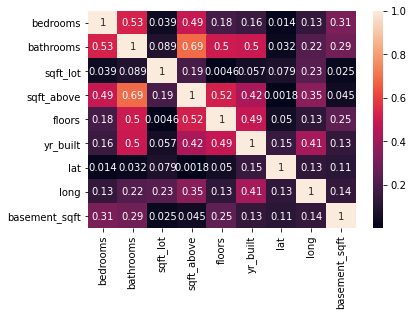

In [88]:
sns.heatmap(abs(X3_train.corr()), annot=True)

#### Normality

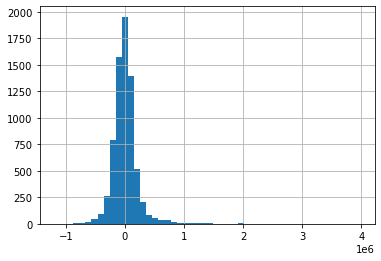

In [89]:
residuals3.hist(bins=50);

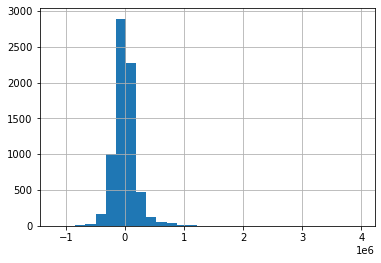

In [90]:
residuals3[abs(residuals3) > 1].hist(bins=30);

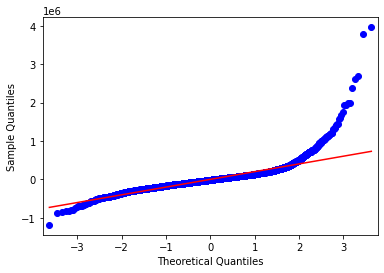

In [91]:
sm.qqplot(residuals3, line='r');

#### Homoskedasticity

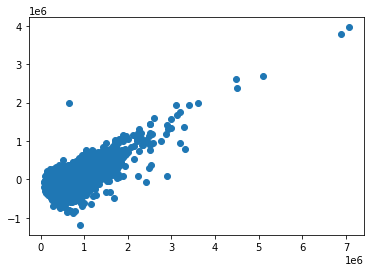

In [92]:
fig, ax = plt.subplots()

ax.scatter(y3_test, residuals3);

### Model 4 - drop long because least corr w/ price

In [93]:
X4 = df_f.drop(columns=['price', 'sqft_living','long'])
y4 = df_f['price']

# train test split
X4_train, X4_test, y4_train, y4_test =train_test_split(X4, y4, test_size=0.33, random_state=42)

In [94]:
len(X4.columns)

8

In [95]:
len(X4_train+X4_test) == len(df_f)

True

In [96]:
train4_df = X4_train.copy()
train4_df['target'] = y4_train

In [97]:
train4_df.head()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft,target
19709,5,3.75,5042,2470,2.0,2014,47.6497,860,1380000.0
4800,3,2.00,13862,1678,1.0,1994,47.3744,0,353000.0
13225,4,1.00,15239,1370,1.5,1930,47.4502,180,685000.0
16111,3,2.50,9471,1760,1.0,1956,47.6760,1000,800000.0
17711,2,1.50,5810,1400,2.0,1940,47.6843,0,575000.0


In [98]:
train4_df.corr()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft,target
bedrooms,1.000000,0.530802,0.039381,0.492576,0.182357,0.155514,-0.014104,0.313925,0.321212
bathrooms,0.530802,1.000000,0.089418,0.690267,0.503681,0.495821,0.031525,0.291926,0.535071
sqft_lot,0.039381,0.089418,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.025161,0.087953
sqft_above,0.492576,0.690267,0.190645,1.000000,0.523269,0.420487,-0.001818,-0.045227,0.601325
floors,0.182357,0.503681,-0.004557,0.523269,1.000000,0.488199,0.049980,-0.245313,0.256883
yr_built,0.155514,0.495821,0.057133,0.420487,0.488199,1.000000,-0.153226,-0.134699,0.046539
lat,-0.014104,0.031525,-0.079332,-0.001818,0.049980,-0.153226,1.000000,0.111379,0.303543
basement_sqft,0.313925,0.291926,0.025161,-0.045227,-0.245313,-0.134699,0.111379,1.000000,0.334761
target,0.321212,0.535071,0.087953,0.601325,0.256883,0.046539,0.303543,0.334761,1.000000


<AxesSubplot:>

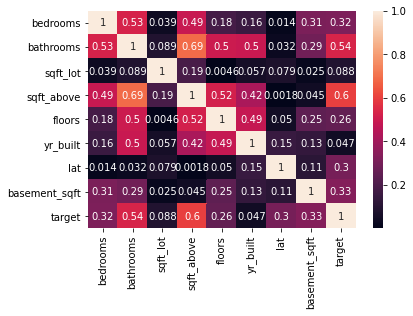

In [99]:
sns.heatmap(abs(train4_df.corr()), annot=True)

In [100]:
train4_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
bathrooms        0.535071
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
floors           0.256883
sqft_lot         0.087953
yr_built         0.046539
Name: target, dtype: float64

#### Scaling

In [101]:
scaler = StandardScaler()
scaler.fit(X4_train)

X4_train_scaled = scaler.transform(X4_train)
X4_test_scaled = scaler.transform(X4_test)

# Second model scaled
model4 = sm.OLS(y4_train, sm.add_constant(X4_train_scaled)).fit()
model4.summary(xname=['Y-Intercept', *X4.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2781.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:34   Log-Likelihood:            -1.9931e+05
No. Observations:               14469   AIC:                         3.986e+05
Df Residuals:                   14460   BIC:                         3.987e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1931.936    280.592      0.000    5.38e+05    5.46e+05
bedrooms      -5.859e+04   2467.085    -23.749      0.000   -6.34e+04   -5.38e+04
bathrooms      5.399e+04   3521.431     15.331      0.000    4.71e+04    6.09e+04
sqft_lot      -9104.6398   1998.008     -4.557      0.000    -1.3e+04   -5188.288
sqft_above     2.488e+05   3106.170     80.095      0.000    2.43e+05    2.55e+05
floors         1.421e+04   2653.428      5.355      0.000    9007.096    1.94e+04
yr_built      -8.246e+04   2464.641    -33.457      0.000   -8.73e+04   -7.76e+04
lat            8.272e+04   2003.816     41.281      0.000    7.88e+04    8.66e+04
basement_sqft  1.212e+05   2520.089     48.092      0.000    1.16e+05    1.26e+05
==============================================================================
Omnibus:                    10440.404   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408161.074
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      28.307   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model3.summary(xname=['Y-Intercept', *X3.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:34   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     2.562e+05   3154.130     81.224      0.000     2.5e+05    2.62e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
yr_built      -7.193e+04   2609.538    -27.563      0.000    -7.7e+04   -6.68e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  1.178e+05   2524.689     46.650      0.000    1.13e+05    1.23e+05
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                         3.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
model.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2512.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:34   Log-Likelihood:            -1.9924e+05
No. Observations:               14469   AIC:                         3.985e+05
Df Residuals:                   14459   BIC:                         3.986e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1922.728    281.936      0.000    5.38e+05    5.46e+05
bedrooms      -5.756e+04   2456.875    -23.428      0.000   -6.24e+04   -5.27e+04
bathrooms       5.26e+04   3506.600     15.001      0.000    4.57e+04    5.95e+04
sqft_living    1.407e+05   1660.490     84.732      0.000    1.37e+05    1.44e+05
sqft_lot      -4778.8223   2021.854     -2.364      0.018   -8741.915    -815.729
sqft_above     1.298e+05   1826.831     71.033      0.000    1.26e+05    1.33e+05
floors         8320.5798   2687.306      3.096      0.002    3053.115    1.36e+04
yr_built      -7.193e+04   2609.538    -27.563      0.000    -7.7e+04   -6.68e+04
lat            8.182e+04   1995.704     40.999      0.000    7.79e+04    8.57e+04
long          -2.686e+04   2271.319    -11.825      0.000   -3.13e+04   -2.24e+04
basement_sqft  5.006e+04   2146.095     23.324      0.000    4.58e+04    5.43e+04
==============================================================================
Omnibus:                    10310.256   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399073.734
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                     7.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
evalute_y4 = pd.DataFrame(y4_test)
evalute_y4.head()

,price
3686,132500.0
10247,415000.0
4037,494000.0
3437,355000.0
19291,606000.0


In [105]:
evalute_y4['prediction'] = model4.predict(sm.add_constant(X4_test_scaled))
evalute_y4.head()

,price,prediction
3686,132500.0,128271.721469
10247,415000.0,462851.174778
4037,494000.0,313284.665866
3437,355000.0,245806.689186
19291,606000.0,429880.933599


In [106]:
evalute_y3.head()

,price,prediction
3686,132500.0,142818.804322
10247,415000.0,466801.393770
4037,494000.0,229523.056476
3437,355000.0,271080.013835
19291,606000.0,445326.501467


In [107]:
train4_preds = model4.predict(sm.add_constant(X4_train_scaled))
test4_preds = model4.predict(sm.add_constant(X4_test_scaled))

print(f"Model4 Train R2: {r2_score(y4_train, train4_preds)}")
print(f"Model4 Test R2: {r2_score(y4_test, test4_preds)}")
print(f"Model4 Test RMSE: {mse(y4_test, test4_preds, squared = False)}")
print('***********************************')
print(f"Model3 Train R2: {r2_score(y3_train, train3_preds)}")
print(f"Model3 Test R2: {r2_score(y3_test, test3_preds)}")
print(f"Model3 Test RMSE: {mse(y3_test, test3_preds, squared = False)}")

Model4 Train R2: 0.6061153929143068
Model4 Test R2: 0.6066992701329257
Model4 Test RMSE: 226757.69705628642
***********************************
Model3 Train R2: 0.6098881818962667
Model3 Test R2: 0.612431640012299
Model3 Test RMSE: 225099.1313603771


#### Residuals

In [108]:
residuals4 = y4_test-test4_preds
residuals4

3686       4228.278531
10247    -47851.174778
4037     180715.334134
3437     109193.310814
19291    176119.066401
             ...      
17525   -115536.192355
5761    -136585.424476
18907    -37608.506399
12348     12732.792153
3448      94525.369952
Name: price, Length: 7128, dtype: float64

In [109]:
RSS4 = sum(residuals4**2)
RSS4

366515011026202.6

In [110]:
RSS3

361173043798590.4

#### Linear?

In [111]:
X4.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'floors', 'yr_built',
       'lat', 'basement_sqft'],
      dtype='object')

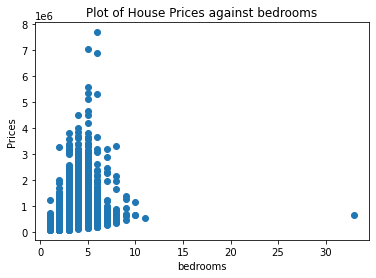

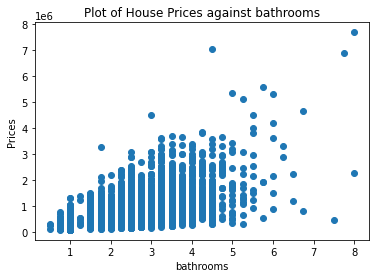

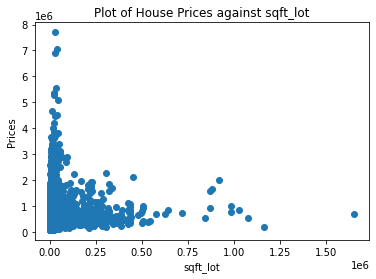

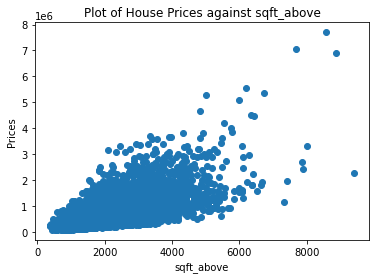

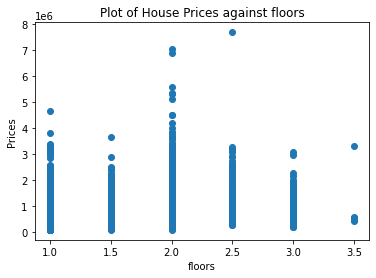

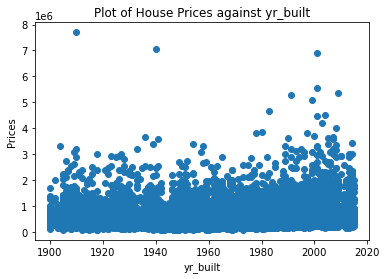

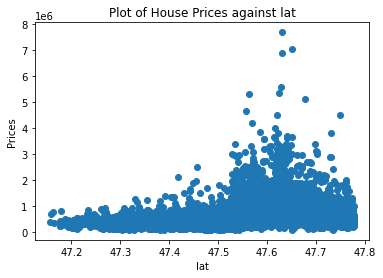

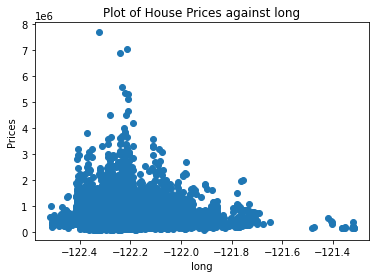

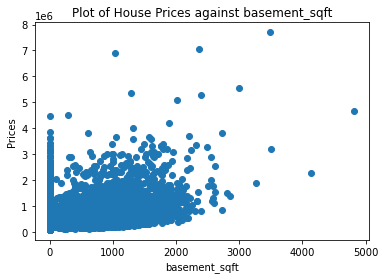

In [112]:
features = X3.columns

for x in features:
    plt.scatter(X[x], y)
    plt.title(f'Plot of House Prices against {x}')
    plt.xlabel(x)
    plt.ylabel('Prices')
    plt.show()

#### Multicollinearity

In [113]:
X4_train.corr()

,bedrooms,bathrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft
bedrooms,1.000000,0.530802,0.039381,0.492576,0.182357,0.155514,-0.014104,0.313925
bathrooms,0.530802,1.000000,0.089418,0.690267,0.503681,0.495821,0.031525,0.291926
sqft_lot,0.039381,0.089418,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.025161
sqft_above,0.492576,0.690267,0.190645,1.000000,0.523269,0.420487,-0.001818,-0.045227
floors,0.182357,0.503681,-0.004557,0.523269,1.000000,0.488199,0.049980,-0.245313
yr_built,0.155514,0.495821,0.057133,0.420487,0.488199,1.000000,-0.153226,-0.134699
lat,-0.014104,0.031525,-0.079332,-0.001818,0.049980,-0.153226,1.000000,0.111379
basement_sqft,0.313925,0.291926,0.025161,-0.045227,-0.245313,-0.134699,0.111379,1.000000


<AxesSubplot:>

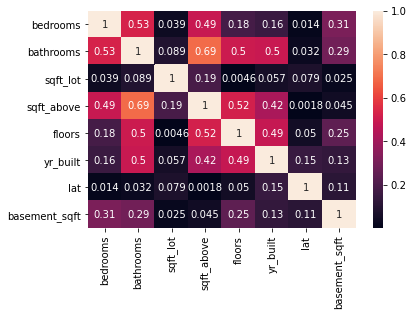

In [114]:
sns.heatmap(abs(X4_train.corr()),annot=True)

#### Normality

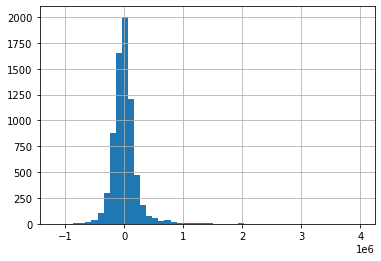

In [115]:
residuals4.hist(bins=50);

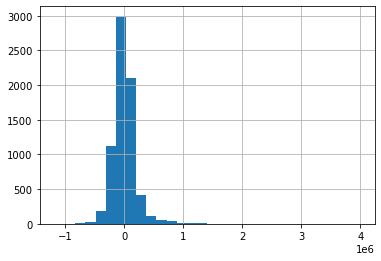

In [143]:
residuals4[abs(residuals4) > 1].hist(bins=30);

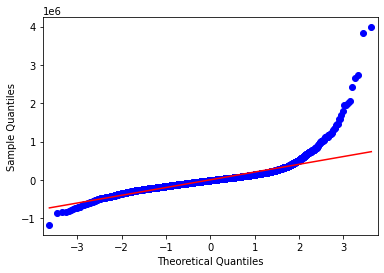

In [144]:
sm.qqplot(residuals4, line='r');

#### Homoskedasticity

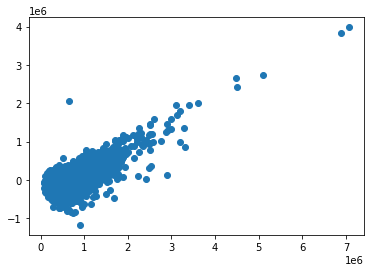

In [118]:
fig, ax = plt.subplots()

ax.scatter(y4_test, residuals4);

### Model 5 - drop bathroom bc multicolinearity

In [119]:
X5 = df_f.drop(columns=['price','bathrooms','sqft_living', 'long'])
y5 = df_f['price']

# train test split
X5_train, X5_test, y5_train, y5_test =train_test_split(X5, y5, test_size=0.33, random_state=42)

In [120]:
train5_df = X5_train.copy()
train5_df['target'] = y5_train

train5_df.head()

,bedrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft,target
19709,5,5042,2470,2.0,2014,47.6497,860,1380000.0
4800,3,13862,1678,1.0,1994,47.3744,0,353000.0
13225,4,15239,1370,1.5,1930,47.4502,180,685000.0
16111,3,9471,1760,1.0,1956,47.6760,1000,800000.0
17711,2,5810,1400,2.0,1940,47.6843,0,575000.0


In [121]:
train5_df.corr()

,bedrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft,target
bedrooms,1.000000,0.039381,0.492576,0.182357,0.155514,-0.014104,0.313925,0.321212
sqft_lot,0.039381,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.025161,0.087953
sqft_above,0.492576,0.190645,1.000000,0.523269,0.420487,-0.001818,-0.045227,0.601325
floors,0.182357,-0.004557,0.523269,1.000000,0.488199,0.049980,-0.245313,0.256883
yr_built,0.155514,0.057133,0.420487,0.488199,1.000000,-0.153226,-0.134699,0.046539
lat,-0.014104,-0.079332,-0.001818,0.049980,-0.153226,1.000000,0.111379,0.303543
basement_sqft,0.313925,0.025161,-0.045227,-0.245313,-0.134699,0.111379,1.000000,0.334761
target,0.321212,0.087953,0.601325,0.256883,0.046539,0.303543,0.334761,1.000000


<AxesSubplot:>

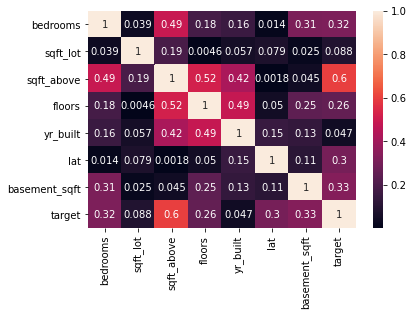

In [122]:
sns.heatmap(abs(train5_df.corr()),annot=True)

In [123]:
train5_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
floors           0.256883
sqft_lot         0.087953
yr_built         0.046539
Name: target, dtype: float64

#### Scaling

In [124]:
scaler = StandardScaler()
scaler.fit(X5_train)

X5_train_scaled = scaler.transform(X5_train)
X5_test_scaled = scaler.transform(X5_test)

# Second model scaled
model5 = sm.OLS(y5_train, sm.add_constant(X5_train_scaled)).fit()
model5.summary(xname=['Y-Intercept', *X5.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3095.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:40   Log-Likelihood:            -1.9942e+05
No. Observations:               14469   AIC:                         3.989e+05
Df Residuals:                   14461   BIC:                         3.989e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1947.507    278.349      0.000    5.38e+05    5.46e+05
bedrooms      -5.148e+04   2442.578    -21.075      0.000   -5.63e+04   -4.67e+04
sqft_lot      -1.002e+04   2013.204     -4.979      0.000    -1.4e+04   -6078.235
sqft_above     2.718e+05   2741.461     99.143      0.000    2.66e+05    2.77e+05
floors         2.648e+04   2550.147     10.385      0.000    2.15e+04    3.15e+04
yr_built      -6.967e+04   2337.969    -29.801      0.000   -7.43e+04   -6.51e+04
lat             8.37e+04   2018.946     41.455      0.000    7.97e+04    8.77e+04
basement_sqft  1.404e+05   2203.938     63.709      0.000    1.36e+05    1.45e+05
==============================================================================
Omnibus:                    10474.294   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414273.909
Skew:                           3.035   Prob(JB):                         0.00
Kurtosis:                      28.501   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model4.summary(xname=['Y-Intercept', *X4.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2781.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:40   Log-Likelihood:            -1.9931e+05
No. Observations:               14469   AIC:                         3.986e+05
Df Residuals:                   14460   BIC:                         3.987e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1931.936    280.592      0.000    5.38e+05    5.46e+05
bedrooms      -5.859e+04   2467.085    -23.749      0.000   -6.34e+04   -5.38e+04
bathrooms      5.399e+04   3521.431     15.331      0.000    4.71e+04    6.09e+04
sqft_lot      -9104.6398   1998.008     -4.557      0.000    -1.3e+04   -5188.288
sqft_above     2.488e+05   3106.170     80.095      0.000    2.43e+05    2.55e+05
floors         1.421e+04   2653.428      5.355      0.000    9007.096    1.94e+04
yr_built      -8.246e+04   2464.641    -33.457      0.000   -8.73e+04   -7.76e+04
lat            8.272e+04   2003.816     41.281      0.000    7.88e+04    8.66e+04
basement_sqft  1.212e+05   2520.089     48.092      0.000    1.16e+05    1.26e+05
==============================================================================
Omnibus:                    10440.404   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408161.074
Skew:                           3.024   Prob(JB):                         0.00
Kurtosis:                      28.307   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multicollinearity

In [126]:
X5_train.corr()

,bedrooms,sqft_lot,sqft_above,floors,yr_built,lat,basement_sqft
bedrooms,1.000000,0.039381,0.492576,0.182357,0.155514,-0.014104,0.313925
sqft_lot,0.039381,1.000000,0.190645,-0.004557,0.057133,-0.079332,0.025161
sqft_above,0.492576,0.190645,1.000000,0.523269,0.420487,-0.001818,-0.045227
floors,0.182357,-0.004557,0.523269,1.000000,0.488199,0.049980,-0.245313
yr_built,0.155514,0.057133,0.420487,0.488199,1.000000,-0.153226,-0.134699
lat,-0.014104,-0.079332,-0.001818,0.049980,-0.153226,1.000000,0.111379
basement_sqft,0.313925,0.025161,-0.045227,-0.245313,-0.134699,0.111379,1.000000


<AxesSubplot:>

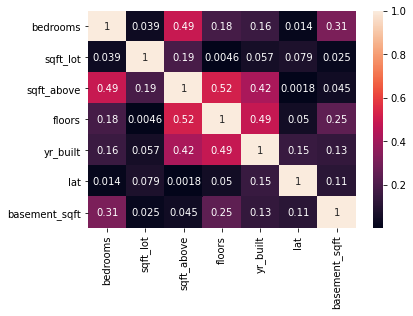

In [127]:
sns.heatmap(abs(X5_train.corr()),annot=True)

### Model 6 - drop floors

In [128]:
X6 = df_f.drop(columns=['price','bathrooms','sqft_living', 'floors', 'long'])
y6 = df_f['price']

# train test split
X6_train, X6_test, y6_train, y6_test =train_test_split(X6, y6, test_size=0.33, random_state=42)

In [129]:
train6_df = X6_train.copy()
train6_df['target'] = y6_train

train6_df.head()

,bedrooms,sqft_lot,sqft_above,yr_built,lat,basement_sqft,target
19709,5,5042,2470,2014,47.6497,860,1380000.0
4800,3,13862,1678,1994,47.3744,0,353000.0
13225,4,15239,1370,1930,47.4502,180,685000.0
16111,3,9471,1760,1956,47.6760,1000,800000.0
17711,2,5810,1400,1940,47.6843,0,575000.0


In [130]:
train6_df.corr()

,bedrooms,sqft_lot,sqft_above,yr_built,lat,basement_sqft,target
bedrooms,1.000000,0.039381,0.492576,0.155514,-0.014104,0.313925,0.321212
sqft_lot,0.039381,1.000000,0.190645,0.057133,-0.079332,0.025161,0.087953
sqft_above,0.492576,0.190645,1.000000,0.420487,-0.001818,-0.045227,0.601325
yr_built,0.155514,0.057133,0.420487,1.000000,-0.153226,-0.134699,0.046539
lat,-0.014104,-0.079332,-0.001818,-0.153226,1.000000,0.111379,0.303543
basement_sqft,0.313925,0.025161,-0.045227,-0.134699,0.111379,1.000000,0.334761
target,0.321212,0.087953,0.601325,0.046539,0.303543,0.334761,1.000000


<AxesSubplot:>

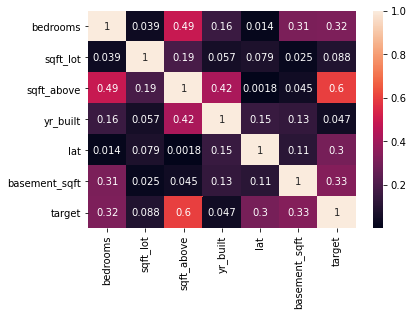

In [131]:
sns.heatmap(abs(train6_df.corr()),annot=True)

In [132]:
train6_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
sqft_lot         0.087953
yr_built         0.046539
Name: target, dtype: float64

#### Scaling

In [133]:
scaler = StandardScaler()
scaler.fit(X6_train)

X6_train_scaled = scaler.transform(X6_train)
X6_test_scaled = scaler.transform(X6_test)

# Second model scaled
model6 = sm.OLS(y6_train, sm.add_constant(X6_train_scaled)).fit()
model6.summary(xname=['Y-Intercept', *X6.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3567.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:43   Log-Likelihood:            -1.9948e+05
No. Observations:               14469   AIC:                         3.990e+05
Df Residuals:                   14462   BIC:                         3.990e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1954.688    277.326      0.000    5.38e+05    5.46e+05
bedrooms      -5.133e+04   2451.543    -20.938      0.000   -5.61e+04   -4.65e+04
sqft_lot      -1.225e+04   2009.144     -6.097      0.000   -1.62e+04   -8311.890
sqft_above     2.822e+05   2559.663    110.266      0.000    2.77e+05    2.87e+05
yr_built      -6.127e+04   2201.565    -27.830      0.000   -6.56e+04    -5.7e+04
lat            8.673e+04   2005.016     43.258      0.000    8.28e+04    9.07e+04
basement_sqft  1.352e+05   2153.751     62.770      0.000    1.31e+05    1.39e+05
==============================================================================
Omnibus:                    10350.532   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395286.892
Skew:                           2.992   Prob(JB):                         0.00
Kurtosis:                      27.897   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
model5.summary(xname=['Y-Intercept', *X5.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3095.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:35:44   Log-Likelihood:            -1.9942e+05
No. Observations:               14469   AIC:                         3.989e+05
Df Residuals:                   14461   BIC:                         3.989e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1947.507    278.349      0.000    5.38e+05    5.46e+05
bedrooms      -5.148e+04   2442.578    -21.075      0.000   -5.63e+04   -4.67e+04
sqft_lot      -1.002e+04   2013.204     -4.979      0.000    -1.4e+04   -6078.235
sqft_above     2.718e+05   2741.461     99.143      0.000    2.66e+05    2.77e+05
floors         2.648e+04   2550.147     10.385      0.000    2.15e+04    3.15e+04
yr_built      -6.967e+04   2337.969    -29.801      0.000   -7.43e+04   -6.51e+04
lat             8.37e+04   2018.946     41.455      0.000    7.97e+04    8.77e+04
basement_sqft  1.404e+05   2203.938     63.709      0.000    1.36e+05    1.45e+05
==============================================================================
Omnibus:                    10474.294   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414273.909
Skew:                           3.035   Prob(JB):                         0.00
Kurtosis:                      28.501   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 7 - drop long

In [145]:
X7 = df_f.drop(columns=['price','bathrooms', 'floors', 'sqft_living'])
y7 = df_f['price']

# train test split
X7_train, X7_test, y7_train, y7_test =train_test_split(X7, y7, test_size=0.33, random_state=42)

In [146]:
train7_df = X7_train.copy()
train7_df['target'] = y7_train

train7_df.head()

,bedrooms,sqft_lot,sqft_above,yr_built,lat,long,basement_sqft,target
19709,5,5042,2470,2014,47.6497,-122.339,860,1380000.0
4800,3,13862,1678,1994,47.3744,-122.190,0,353000.0
13225,4,15239,1370,1930,47.4502,-122.378,180,685000.0
16111,3,9471,1760,1956,47.6760,-122.272,1000,800000.0
17711,2,5810,1400,1940,47.6843,-122.341,0,575000.0


In [147]:
train7_df.corr()

,bedrooms,sqft_lot,sqft_above,yr_built,lat,long,basement_sqft,target
bedrooms,1.000000,0.039381,0.492576,0.155514,-0.014104,0.134689,0.313925,0.321212
sqft_lot,0.039381,1.000000,0.190645,0.057133,-0.079332,0.233358,0.025161,0.087953
sqft_above,0.492576,0.190645,1.000000,0.420487,-0.001818,0.345686,-0.045227,0.601325
yr_built,0.155514,0.057133,0.420487,1.000000,-0.153226,0.412844,-0.134699,0.046539
lat,-0.014104,-0.079332,-0.001818,-0.153226,1.000000,-0.134008,0.111379,0.303543
long,0.134689,0.233358,0.345686,0.412844,-0.134008,1.000000,-0.141449,0.021893
basement_sqft,0.313925,0.025161,-0.045227,-0.134699,0.111379,-0.141449,1.000000,0.334761
target,0.321212,0.087953,0.601325,0.046539,0.303543,0.021893,0.334761,1.000000


<AxesSubplot:>

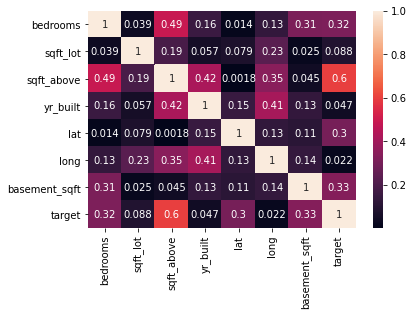

In [148]:
sns.heatmap(abs(train7_df.corr()),annot=True)

In [149]:
train6_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
sqft_lot         0.087953
yr_built         0.046539
Name: target, dtype: float64

In [150]:
train7_df.corr()['target'].sort_values(ascending=False)

target           1.000000
sqft_above       0.601325
basement_sqft    0.334761
bedrooms         0.321212
lat              0.303543
sqft_lot         0.087953
yr_built         0.046539
long             0.021893
Name: target, dtype: float64

In [151]:
scaler = StandardScaler()
scaler.fit(X7_train)

X7_train_scaled = scaler.transform(X7_train)
X7_test_scaled = scaler.transform(X7_test)

# Second model scaled
model7 = sm.OLS(y7_train, sm.add_constant(X7_train_scaled)).fit()
model7.summary(xname=['Y-Intercept', *X7.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     3127.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:44:38   Log-Likelihood:            -1.9938e+05
No. Observations:               14469   AIC:                         3.988e+05
Df Residuals:                   14461   BIC:                         3.988e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1941.492    279.211      0.000    5.38e+05    5.46e+05
bedrooms      -5.037e+04   2435.945    -20.679      0.000   -5.51e+04   -4.56e+04
sqft_lot      -6520.0428   2036.652     -3.201      0.001   -1.05e+04   -2527.945
sqft_above     2.874e+05   2568.438    111.889      0.000    2.82e+05    2.92e+05
yr_built      -5.158e+04   2292.387    -22.502      0.000   -5.61e+04   -4.71e+04
lat            8.481e+04   1996.145     42.488      0.000    8.09e+04    8.87e+04
long           -3.16e+04   2244.083    -14.080      0.000    -3.6e+04   -2.72e+04
basement_sqft   1.32e+05   2150.977     61.380      0.000    1.28e+05    1.36e+05
==============================================================================
Omnibus:                    10226.181   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389414.580
Skew:                           2.938   Prob(JB):                         0.00
Kurtosis:                      27.727   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
model6.summary(xname=['Y-Intercept', *X6.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3567.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:44:41   Log-Likelihood:            -1.9948e+05
No. Observations:               14469   AIC:                         3.990e+05
Df Residuals:                   14462   BIC:                         3.990e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Y-Intercept    5.421e+05   1954.688    277.326      0.000    5.38e+05    5.46e+05
bedrooms      -5.133e+04   2451.543    -20.938      0.000   -5.61e+04   -4.65e+04
sqft_lot      -1.225e+04   2009.144     -6.097      0.000   -1.62e+04   -8311.890
sqft_above     2.822e+05   2559.663    110.266      0.000    2.77e+05    2.87e+05
yr_built      -6.127e+04   2201.565    -27.830      0.000   -6.56e+04    -5.7e+04
lat            8.673e+04   2005.016     43.258      0.000    8.28e+04    9.07e+04
basement_sqft  1.352e+05   2153.751     62.770      0.000    1.31e+05    1.39e+05
==============================================================================
Omnibus:                    10350.532   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395286.892
Skew:                           2.992   Prob(JB):                         0.00
Kurtosis:                      27.897   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""